# Regional temperature distribution

In [1]:
import sys
import os
aps_path = os.path.dirname(os.path.abspath("."))
sys.path.append(aps_path)
print(aps_path)

D:\Dev


In [4]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from aps_io.get_arome import nc_load

In [5]:
%matplotlib inline

Read temperature data from netcdf file and clip to a subregion.

In [9]:
nc = Dataset("../data/t2myr_kf0_5km_20161027_00.nc", "r")

time_var = nc.variables['time']
altitude_var = nc.variables['altitude']
temperature_var = nc.variables['air_temperature_2m']

In [12]:
x1, x2 = 600, 650
y1, y2 = 1000, 1100
t1, t2 = 6, 30

altitude = altitude_var[y1:y2, x1:x2]
temperature = temperature_var[t1:t2, y1:y2, x1:x2]

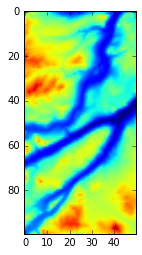

In [13]:
plt.imshow(altitude, aspect='equal')
plt.show()

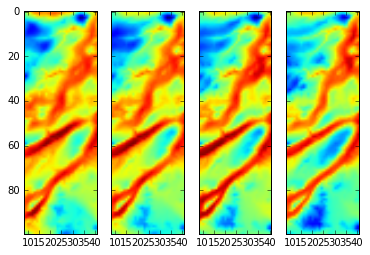

In [22]:
f, axarr = plt.subplots(1, 4, sharey=True)
for i in [0, 1, 2, 3]:
    j = i + (6*i) 
    axarr[i].imshow(temperature[i, :, :], aspect='equal')
plt.show()

In [6]:
jd, altitude, land_area_fraction, nc_vars = nc_load("../data/t2myr_kf0_5km_20161027_00.nc",
                                                    ['air_temperature_2m'], [59.0, 60.0, 8.5, 9.0], [6, 30])
#[59.0, 60.0, 8.5, 9.0]

### DIMENSIONS ###
OrderedDict([('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 67
), ('rlon', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlon', size = 1060
), ('rlat', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlat', size = 3680
)])
-	time
-	rlon
-	rlat
### VARIABLES ###
-	time
-	forecast_reference_time
-	projection_3
-	rlon
-	rlat
-	longitude
-	latitude
-	altitude
-	air_temperature_2m
Variables 'x' and 'y' are not provided.
Variable 'land_area_fraction' is not provided.
929 0 0 1059


In [10]:
# create elevation masks
above1000 = np.ma.masked_less_equal(altitude, 1000.0).mask # returns the  inverse
below1000 = np.ma.masked_greater_equal(altitude, 1000.0).mask
print(altitude, below1000, above1000)
print(nc_vars)

[] False False
{'air_temperature_2m': array([], shape=(24, 0, 1059), dtype=float32)}


C:\Anaconda\envs\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


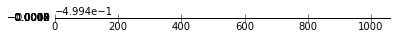

In [11]:
temp = np.ma.masked_array(nc_vars['air_temperature_2m'][0, :, :], above1000)
plt.imshow(temp, aspect='equal')
plt.show()

In [8]:
flier_low = np.nanpercentile(temp, 5.0))
flier_high = np.nanpercentile(temp, 95.0))
center = np.nanmean(temp) # should be median

SyntaxError: invalid syntax (<ipython-input-8-ee52b5672ccd>, line 1)

In [ ]:
box_data = np.concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
plt.boxplot(box_data)